In [18]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [3]:
# Import the data
df = pd.read_csv("Resources/lending_data.csv")
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [6]:
# Define the X (features) and y (target) sets
y = df["loan_status"].values
X = df.drop("loan_status", axis=1)

In [7]:
# Split the data into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
# Train a Logistic Regression model print the model score
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Testing Data Score: 0.9924680148576145


In [12]:
# Train a Random Forest Classifier model and print the model score
clf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
print(f'Testing Score: {clf.score(X_test, y_test)}')

Testing Score: 0.9920037144036319


Everything below this point is just me experimenting to see what difference different things make!

[1.63813296e-01 3.45880873e-01 1.69464523e-01 1.24961076e-01
 5.31782853e-02 1.08536410e-04 1.42593410e-01]


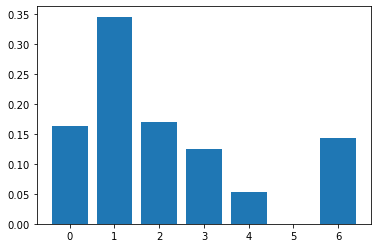

In [17]:
#trying feature selection on the logistic regression model
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [19]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True,  True,  True, False, False, False, False])

In [20]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [21]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Testing Score: 0.9680664465538589


In [14]:
#trying RFC with scaling
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf2 = RandomForestClassifier(random_state=42).fit(X_train_scaled, y_train)
print(f'Testing Score: {clf2.score(X_test_scaled, y_test)}')

Testing Score: 0.9917457697069748
